# 3. Optimization and Object Design

```{index} optimization
```

```{admonition} Intro
Optimization is the problem of finding a maximum or minimum value of an objective function, and is one of the main applications of differential calculus. In this section we will consider optimal design of several objects encountered in every day life.
```

## Example 1: Cathedral Door

``` {admonition} Example 1: Cathedral Door
Suppose we wish to design a cathedral door with a rectangular base and semi-circular top. How can we maximize the area $A$ of the door for a given perimeter $P$?

This can be solved using calculus as outlined below.

```

<img src="door.png" width="100px"> 


<img src="door1.png" width="100px"> 


1) First note that the perimeter $P$ is kept constant throughout this problem.  The radius $r$ and height $h$ must satisfy the equation

$$P=2r + 2h + \pi r.$$

This implies that $P=(2+\pi)r+2h$ or $2h= P-(2+\pi)r$. This tells us the height $h$ of the door is related to the constant perimeter $P$ and radius $r$ as follows:

$$h= \frac{P}{2}-(1+\frac{\pi}{2})r.$$

2) Next note that the total area $A$ of the door is the sum of the recatangular base with area $2rh$ and semi-circular top with area $\frac{1}{2}\pi r^2$:

$$
A= 2rh + \frac{1}{2}\pi r^2.
$$

We can replace the height $h$ with the expression we obtained in step 1):

$$
A=2r[ \frac{P}{2}-(1+\frac{\pi}{2})r]+ \frac{1}{2}\pi r^2.
$$

We simplify the right side of the last equation as follows:

$$
A= Pr - r^2(2+\pi)+\frac{1}{2}\pi r^2
$$ 

or

$$
A= Pr - r^2(2+\frac{\pi}{2}).
$$



3) Keeping in mind that $P$ is a constant, we compute the derivative $\frac{dA}{dr}$ and set it equal to zero:

$$\frac{dA}{dr} = P - 2r(2+\frac{\pi}{2})=0.$$

This gives us the optimal radius $r$ of the door in terms of the fixed perimeter $P$:

$$P = 2r(2+\frac{\pi}{2})=r(4+\pi)\,\,\,\Rightarrow\,\,\, r = \frac{P}{4+\pi}.$$

4) The corresponding value for the height $h$ of the door is

$$h= \frac{P}{2} - (1+\frac{\pi}{2})r=\frac{P}{2} - (1+\frac{\pi}{2})\frac{P}{4+\pi}=\frac{P[4+\pi -2(1+\frac{\pi}{2})]}{2(4+\pi)}=\frac{P}{4+\pi}.  $$

(Note that the optimal radius and height are equal to each other: the door is low and wide.)

5) Finally, note that the second derivative is negative, guaranteeing that we have maximized rather than minimized the area:

$$A''(r)= -2(2+\frac{\pi}{2})<0.$$

## Example 2: Office Space Design

``` {admonition} Example 2: Office Design

Consider the problem of designing an office space. We will consider two designs, and decide which is better on the basis of lower cost of wall materials per unit area of enclosed workspace.  For simplicity, assume that the cost of wall materials is  1 monetary unit per unit of wall base area.

```

<img src="fig1.png" width="400px"> 

For the square carrel, the area of the wall is $4x^2+4x$ and the enclosed workspace is 1 square unit, so the cost of materials per square foot of workspace is 

$$
f(x) =  4x^2+4x.
$$

For the hexagona carrel, the area of the wall is $3x^2\frac{\sqrt{3}}{2}+6x$ and the enclosed workspace has area $\frac{3\sqrt{3}}{2}.$  Thus, the cost of materials per square foot of workspace is


$$
g(x) =  \frac{3x^2\frac{\sqrt{3}}{2}+6x}{\frac{3\sqrt{3}}{2}} = x^2+\frac{4x}{\sqrt{3}} .
$$




Note that both functions start at the origin, and for any wall thickness $x>0$, we must have $f(x)>g(x)$. We can argue this analytically since we first compute $f'(x)=8x+4$, $f''(x)=8$ and $g'(x)=2x+\frac{4}{\sqrt{3}}$ and $g''(x)=2$. Note that $f'(0)=8$ and $f''(x)=8$ for all $x$. On the other hand, $g'(0)=2+\frac{4}{\sqrt{3}}$ and $g''(x)=2$ for all $x$. Thus the graph of $f(x)$ has a steeper tangent than $g(x)$ at $x=0$. Moreover, the concavity of $f(x)$ is greater than the concavity of $g(x)$ for all $x\ge0$.  This guarantees $f(x)>g(x)$.

Graphically, we can use code from Section 4 of the Calculus chapter to confirm this relationship.

Equation of Lf(x): 4 x
Equation of Lg(x): 2.3094010767585 x


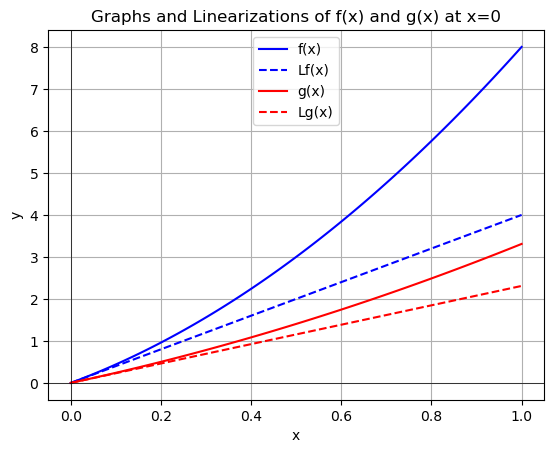

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


# Create a symbolic expression for the given equation
x = sp.symbols('x')
f = sp.lambdify(x, 4*x**2+4*x)
g = sp.lambdify(x, x**2+4*x/np.sqrt(3))

# Calculate the derivative of f(x) at x=a
a=0
f_prime = sp.diff( 4*x**2+4*x, x).subs(x, a)
g_prime = sp.diff(x**2+4*x/np.sqrt(3), x).subs(x, a)

# Calculate the linearization L(x) at x=a
Lf_expr = f(a) + f_prime * (x - a)
Lf = sp.lambdify(x, Lf_expr)

Lg_expr = g(a) + g_prime * (x - a)
Lg = sp.lambdify(x, Lg_expr)

# Generate x values from a to a+1
x_vals = np.linspace(a , a + 1, 100)

#Print the linearization L(x)
print("Equation of Lf(x):", sp.latex(Lf_expr))
print("Equation of Lg(x):", sp.latex(Lg_expr))

# Plot f(x), L(x), and the point (a, f(a))
plt.plot(x_vals, f(x_vals), 'b',label="f(x)")
plt.plot(x_vals, Lf(x_vals),'b--', label="Lf(x)")
plt.plot(x_vals, g(x_vals),'r', label="g(x)")
plt.plot(x_vals, Lg(x_vals), 'r--',label="Lg(x)")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphs and Linearizations of f(x) and g(x) at x=0")
plt.legend()
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.show()

## Exercises

```{admonition}  Exercises
1. Suppose a bulk food container is in the shape of a right-circular cylinder and designed to hold 250 cubic inches.  Our goal is to find the dimensions of the can which will minimize the amount of material needed for construction.

a) Make a sketch of the can, using $x$ for the radius of the can and $h$ for the height.

b) Given that the volume $V$ of the can is 250 cubic inches, find a formula for $h$ in terms of $x$.

c) Find a function $f(x)$ which gives the total area of the can (top, bottom, and side) in terms of $x$.

d) Compute $f'(x)$.

e) Find $x$ such that $f'(x)=0$.

f) Find $h$ corresponding to the $x$ in part 5).

g) What is the relationship between the diameter of the can (2x) and the height $h?$. Describe the shape of the bulk food can. 

h) Use the second derivative to explain why your answer gives a minimum amount of material used to construct the can.

2)  Suppose you would like to design a paper cup using a circular piece of paper of radius $r$, cutting out a sector from the circle, and joining the two radial edges OA and OB.

a) What is the maximum volume of the cup?

b) Does the second derivative test apply?

c) Make a graph of the volume of the cup as a function of its height $h$ for the case $r=1$.

<img src="fig2.png" width="100px"> 
```